# ***C/A code Generation for Satellite Vehicle no. 11***

---



---



> --

> Submitted By ***Aazad Patle***




In [1]:
Satellite_Vehicle_No = 11

In [2]:
# Indexes from which Output for each step is Taken  
G2_Taps = [3,4]
G1_Taps = [10]

#### POLYNOMIAL G1 = 1+X****3** + X*****10***
#### POLYNOMIAL G2 = 1+X****2** + X****3** + X****6** + X****8** + X****9** + X*****10***

In [3]:
# THE FEEDBACK TO BE TAKEN FROM BIT 3 AND 10 FOR G1 and 2,3,6,8,9 and 10 for G2

feed_G1 = [3,10]
feed_G2 = [2,3,6,8,9,10]

### XOR function for list

In [4]:
def XOR(ele):
  k = ele[0]
  for i in range(1,len(ele)):
    k = k^ele[i]
  return k

#Shift Registers


In [5]:
def shift_reg(register, feedback, output):

    # calculate output
    out = [register[i-1] for i in output]
    if len(out) > 1:
        out = XOR(out)
    else:
        out = out[0]

    fb = XOR([register[i-1] for i in feedback])   
   
    # shift to the right
    for i in reversed(range(len(register[1:]))):
        register[i+1] = register[i]
        
    # put feedback in position 1
    register[0] = fb
    
    return out

In [6]:
# Since Stellite generate 1023 bit long code in 1 ms

# PNR(C/A) code Calculation

In [7]:
def PRN(feed_G1,feed_G2,G1_Taps,G2_Taps):
  #  linear feedback shift register Initialization for gold code 1 and 2
  G1 = [ 1 for i in range(10)]
  G2 = [ 1 for i in range(10)]
  
  CA = [] 
 
  # create sequence
    
  for i in range(1023): 
    g1 = shift_reg(G1,feed_G1, G1_Taps)
    g2 = shift_reg(G2, feed_G2, G2_Taps)
    CA.append(g1^g2)

# return C/A code!
  return CA

In [8]:
result = PRN(feed_G1,feed_G2,G1_Taps,G2_Taps)
print(result)

[1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 

# Verification of result

In [9]:
# storing First 10 chip binaryy
def convert(list): 
      
    # Converting integer list to string list 
    s = [str(i) for i in list] 
      
    # Join list items using join() 
    res = str("".join(s)) 
      
    return(res)

In [10]:
First_10_chipp_bin = convert(result[:10])

In [11]:
First_10_chipp_bin

'1110100010'

In [12]:
# bin_to_oct conversion 
def createMap(bin_oct_map): 
    bin_oct_map["000"] = '0'
    bin_oct_map["001"] = '1'
    bin_oct_map["010"] = '2'
    bin_oct_map["011"] = '3'
    bin_oct_map["100"] = '4'
    bin_oct_map["101"] = '5'
    bin_oct_map["110"] = '6'
    bin_oct_map["111"] = '7'

def convertBinToOct(bin):  
    l = len(bin) 
      
    # length of string before '.'  
    t = -1
    if '.' in bin: 
        t = bin.index('.')  
        len_left = t 
    else: 
        len_left = l  
      
    # add min 0's in the beginning to make  
    # left substring length divisible by 3  
    for i in range(1, (3 - len_left % 3) % 3 + 1): 
        bin = '0' + bin
      
    # if decimal point exists  
    if (t != -1):  
          
        # length of string after '.'  
        len_right = l - len_left - 1
          
        # add min 0's in the end to make right  
        # substring length divisible by 3  
        for i in range(1, (3 - len_right % 3) % 3 + 1): 
            bin = bin + '0'
      
    # create dictionary between binary and its  
    # equivalent octal code  
    bin_oct_map = {} 
    createMap(bin_oct_map) 
    i = 0
    octal = "" 
    while (True) : 
        octal += bin_oct_map[bin[i:i + 3]]  
        i += 3
        if (i == len(bin)):  
            break          

        if (bin[i] == '.'): 
            octal += '.'
            i += 1           
    # required octal number  
    return octal

In [13]:
octal = convertBinToOct(First_10_chipp_bin)
print(octal)

1642


# Table for cross checking result
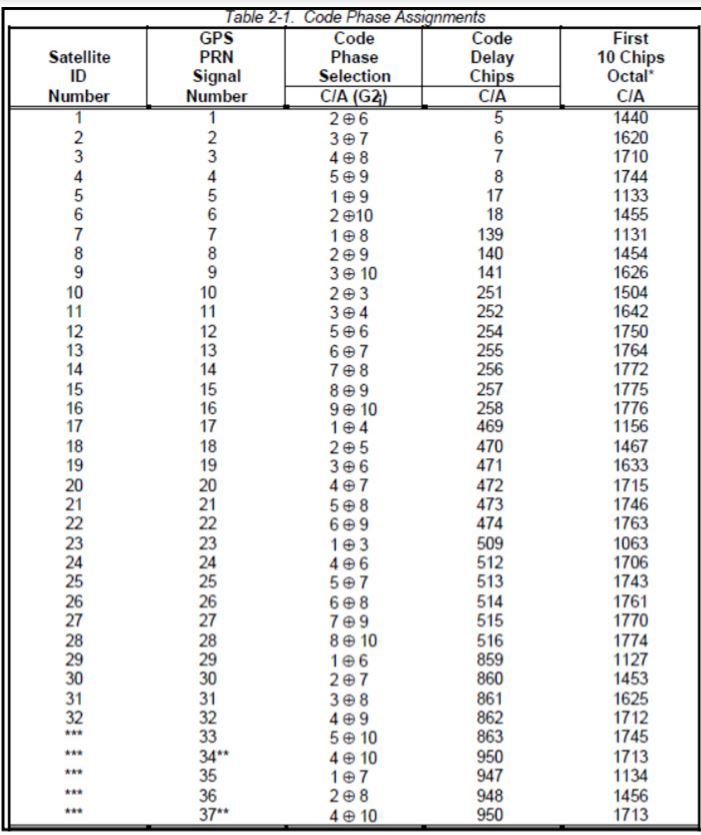

# Plotting Output

In [14]:
import matplotlib.pyplot as plt
import numpy as np

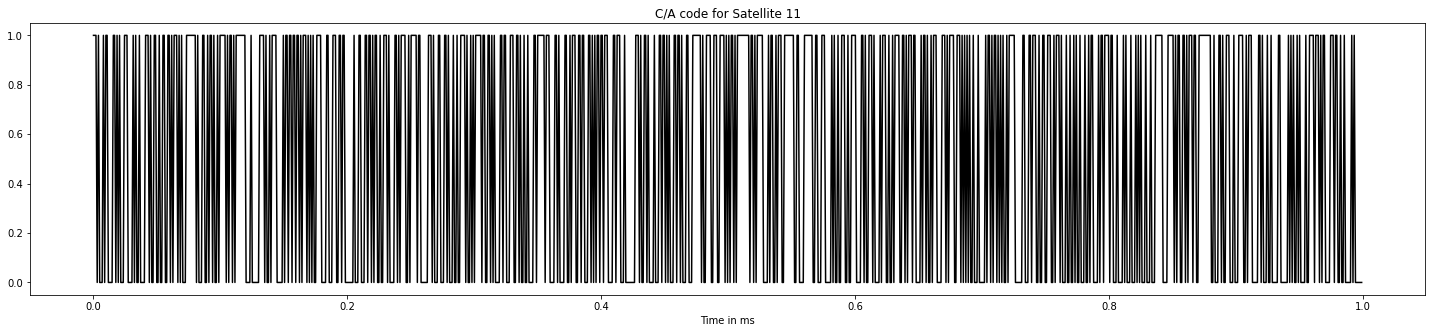

In [15]:
plt.figure(figsize=(25,5))
plt.plot(np.arange(0,1,1/1023), result, 'black')
plt.xlabel('Time in ms')
plt.title('C/A code for Satellite 11')
plt.show()